# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
start = datetime.datetime(2015, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Run Strategy

In [4]:
s = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=85, margin=1.833,
                      period=7, sma=70, use_regime_filter=True)
s.run()

Retrieve log DataFrames

In [5]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
292,2020-12-11,363.55,2020-12-16,367.40,3.84,11231.18,2924,581329.59,LONG,SPY
293,2021-01-15,374.47,2021-01-20,382.64,8.16,23624.50,2894,604954.10,LONG,SPY
294,2021-01-27,373.19,2021-02-04,384.93,11.74,35459.47,3020,640413.57,LONG,SPY
295,2021-02-19,388.76,2021-03-10,388.31,-0.45,-1375.15,3066,639038.41,LONG,SPY
296,2021-03-19,389.48,2021-03-26,395.98,6.50,19851.00,3054,658889.41,LONG,SPY


In [7]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-22,663056.26,650534.84,658536.31,3054,-540433.54,1.82,-
2021-03-23,661193.27,646534.11,649099.46,3054,-540433.54,1.83,-
2021-03-24,659024.96,642899.84,643052.51,3054,-540433.54,1.84,-
2021-03-25,652306.12,631997.04,649710.30,3054,-540433.54,1.83,-
2021-03-26,668889.41,668889.41,668889.41,0,668889.41,1.00,X


Generate strategy stats - display all available stats

In [8]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2021-03-26
beginning_balance                                            10000
ending_balance                                           668889.41
total_net_profit                                         658889.41
gross_profit                                            1204011.06
gross_loss                                              -545121.64
profit_factor                                                 2.21
return_on_initial_capital                                  6588.89
annual_return_rate                                           16.60
trading_period                           27 years 4 months 15 days
pct_time_in_market                                           32.02
margin                                                        1.83
avg_leverage                                                  1.27
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
len(benchmark.dbal)

6892

Plot Equity Curves: Strategy vs Benchmark

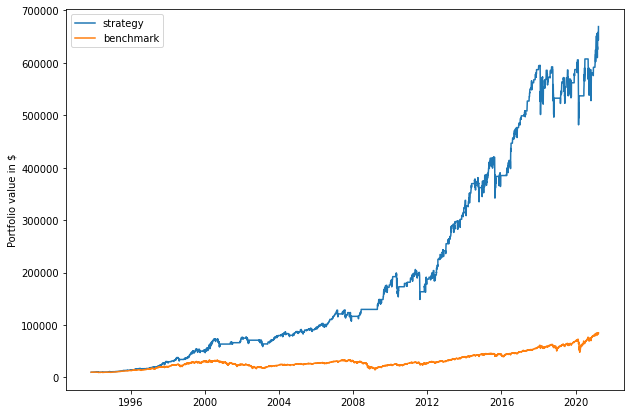

In [10]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

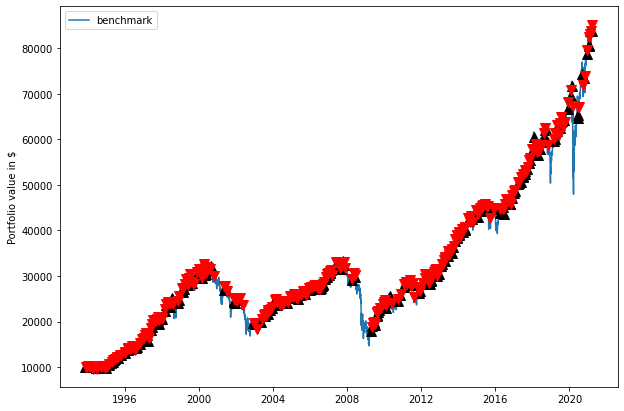

In [11]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,16.60,8.14
max_closed_out_drawdown,-27.75,-56.42
annualized_return_over_max_drawdown,0.60,0.14
best_month,25.30,23.06
worst_month,-24.95,-31.38
sharpe_ratio,0.89,0.51
sortino_ratio,0.70,0.64
monthly_std,4.13,4.52
annual_std,17.31,16.55


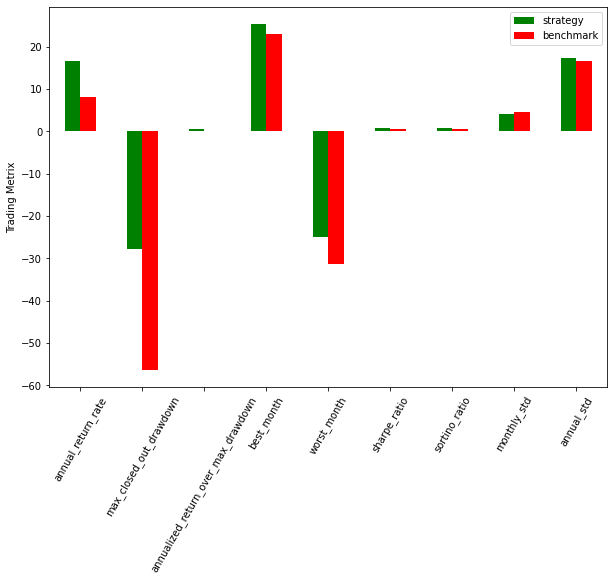

In [12]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.14
median,0.13,0.12
min,0.03,0.00
max,0.96,0.70
std,0.11,0.13
last,0.17,0.30


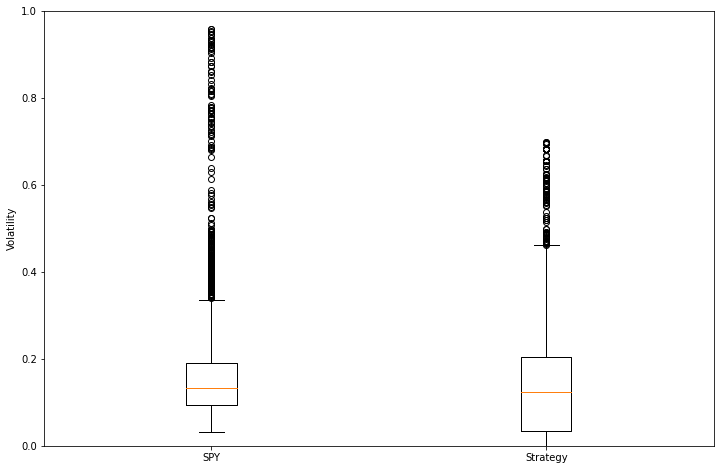

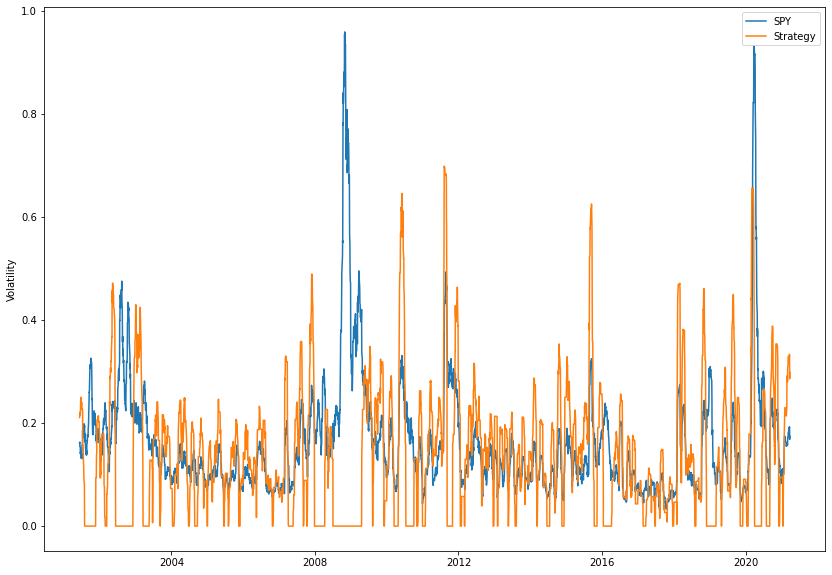

In [13]:
df = pf.volatility_graphs([s.ts, dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

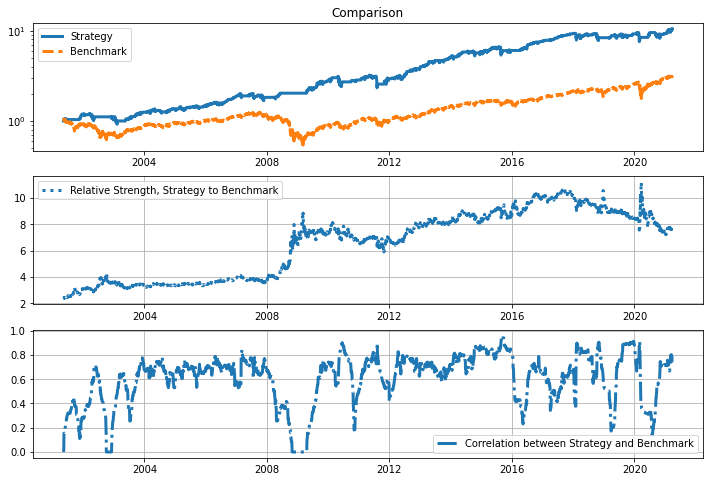

In [14]:
returns = dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)